<a href="https://www.kaggle.com/code/hosen42/flower-classifier-with-resnet50?scriptVersionId=131054430" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.utils import plot_model
from glob import glob
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Softmax
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# model = Sequential()

# #1st Layer
# model.add(Conv2D()) # Feature Processing
# model.add(Maxpooling2D()) # Down Sampling or Sampling
# model.add(BatchNormalization()) # Normalized or Scalling
# model.add(Dropout(0.3)) # Dropout

# #1st Layer
# model.add(Conv2D())
# model.add(Maxpooling2D())
# model.add(BatchNormalization())
# model.add(Dropout(0.3))


# #1st Layer
# model.add(Conv2D())
# model.add(Maxpooling2D())
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

In [3]:
Image_size = [224,224]
valid_path = "/kaggle/input/flowers/flowers/validation"
train_path = "/kaggle/input/flowers/flowers/train"

In [4]:
# [224,224] + 3

In [5]:
# x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
# x = layers.Conv2D(64, (7, 7),
#                   strides=(2, 2),
#                   padding='valid',
#                   kernel_initializer='he_normal',
#                   name='conv1')(x)
# x = layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
# x = layers.Activation('relu')(x)
# x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
# x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

# x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
# x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
# x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

# x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
# x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
# x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
# x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

# x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
# x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
# x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
# x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
# x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
# x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

# x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
# x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
# x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

94765736/94765736 [==============================] - 0s 0us/step


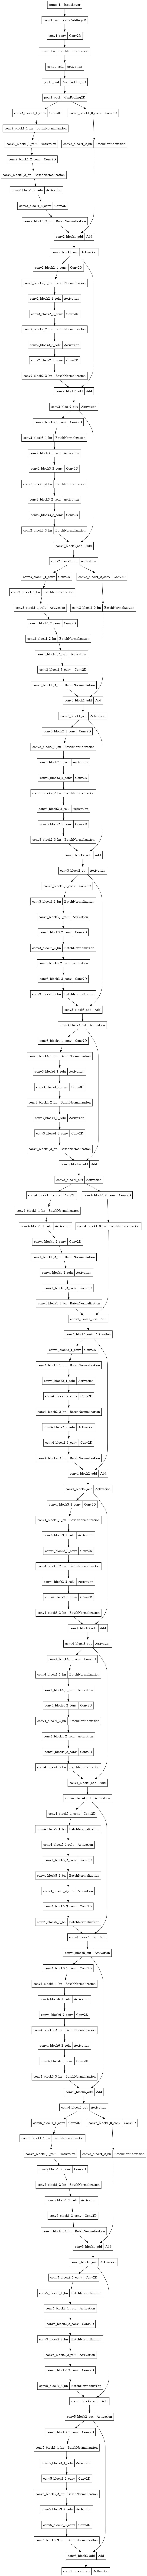

In [6]:
resnet = ResNet50(include_top=False , input_shape=Image_size+[3],weights='imagenet')
plot_model(resnet)

In [7]:
for layer in resnet.layers:
    layer.trainable = False #True#False

In [8]:
folders = glob("/kaggle/input/flowers/flowers/train/*")
folders

['/kaggle/input/flowers/flowers/train/bluebell',
 '/kaggle/input/flowers/flowers/train/fritillary',
 '/kaggle/input/flowers/flowers/train/daffodil',
 '/kaggle/input/flowers/flowers/train/lily_valley',
 '/kaggle/input/flowers/flowers/train/crocus',
 '/kaggle/input/flowers/flowers/train/cowslip',
 '/kaggle/input/flowers/flowers/train/colts_foot',
 '/kaggle/input/flowers/flowers/train/tigerlily',
 '/kaggle/input/flowers/flowers/train/dandelion',
 '/kaggle/input/flowers/flowers/train/buttercup',
 '/kaggle/input/flowers/flowers/train/daisy',
 '/kaggle/input/flowers/flowers/train/pansy',
 '/kaggle/input/flowers/flowers/train/windflower',
 '/kaggle/input/flowers/flowers/train/sunflower',
 '/kaggle/input/flowers/flowers/train/tulip',
 '/kaggle/input/flowers/flowers/train/snowdrop',
 '/kaggle/input/flowers/flowers/train/iris']

In [9]:
x = Flatten()(resnet.output)

prediction = Dense(len(folders),activation='softmax')(x)
model = Model(inputs = resnet.input , outputs = prediction)
plot_model(model)
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory("/kaggle/input/flowers/flowers/train/",target_size=(224,224),batch_size=32,class_mode='categorical')
test_set = train_datagen.flow_from_directory("/kaggle/input/flowers/flowers/validation/",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


In [12]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))


Epoch 1/5
38/38 [==============================] - 156s 4s/step - loss: 13.6808 - accuracy: 0.0798 - val_loss: 5.7488 - val_accuracy: 0.1118
Epoch 2/5
38/38 [==============================] - 146s 4s/step - loss: 3.9525 - accuracy: 0.2067 - val_loss: 3.0960 - val_accuracy: 0.1765
Epoch 3/5
38/38 [==============================] - 148s 4s/step - loss: 2.8996 - accuracy: 0.2328 - val_loss: 2.9578 - val_accuracy: 0.2941
Epoch 4/5
38/38 [==============================] - 148s 4s/step - loss: 2.8853 - accuracy: 0.2874 - val_loss: 3.0580 - val_accuracy: 0.3000
Epoch 5/5
38/38 [==============================] - 148s 4s/step - loss: 2.5096 - accuracy: 0.3370 - val_loss: 2.5317 - val_accuracy: 0.3176


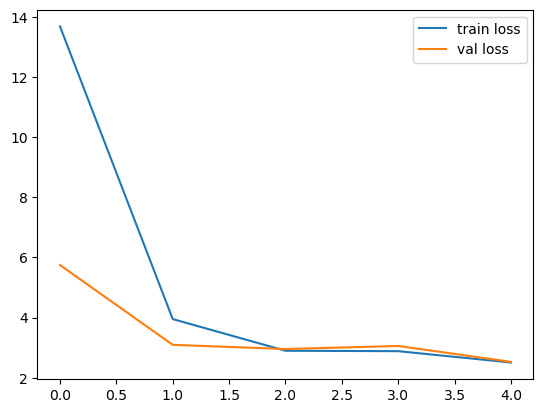

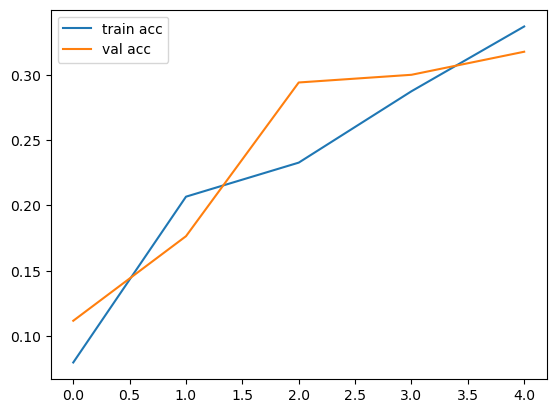

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
import numpy as np
from tensorflow.keras.models import load_model
model.save('./model_resnet50.h5')
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

6/6 [==============================] - 19s 3s/step


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('./model_resnet50.h5')

In [16]:
img=image.load_img('/kaggle/input/flowers/flowers/validation/bluebell/image_0241.jpg',target_size=(224,224))
x=image.img_to_array(img)
x =x /255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [17]:
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds==1:
    preds="The Flower IS bluebell"
elif preds==2:
    preds="The Flower is buttercup"
elif preds==2:
    preds="The Flower is colts_foot"
elif preds==2:
    preds="The Flower is cowslip"
elif preds==2:
    preds="The Flower is daffodil"
elif preds==2:
    preds="The Flower is daisy"
elif preds==2:
    preds="The Flower is dandelion"
elif preds==2:
    preds="The Flower is fritillary"
elif preds==2:
    preds="The Flower is lily_valley"
elif preds==2:
    preds="The Flower is pansy"
elif preds==2:
    preds="The Flower is snowdrop"
elif preds==2:
    preds="The Flower is iris"
elif preds==2:
    preds="The Flower is tigerlily"
elif preds==2:
    preds="The Flower is tulip"
else:
    preds="The Car Is windflower"

1/1 [==============================] - 1s 1s/step


In [18]:
print(preds)

The Car Is windflower
